Calculating return value from the close values
**r(d) = (p(d) - p(d-1))/p(d-1)**

In [2]:
import pandas as pd

# Read the CSV file
file_path = "/content/appleStock.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate returns
returns = []
for i in range(len(df)):
    if i == 0:
        # For the first date, use the return from the second date
        return_val = (df.at[i + 1, 'FIBBG000B9XRY4'] - df.at[i, 'FIBBG000B9XRY4']) / df.at[i, 'FIBBG000B9XRY4']
        returns.append(return_val)
    else:
        prev_price = df.at[i - 1, 'FIBBG000B9XRY4']  # Previous day's price
        current_price = df.at[i, 'FIBBG000B9XRY4']  # Current day's price
        return_val = (current_price - prev_price) / prev_price  # Calculate return
        returns.append(return_val)

# Add 'Return' column to the DataFrame
df['Return'] = returns

# Set the index to the values from the 'Field' column
df.set_index('Field', inplace=True)

# Format the 'Return' column to display up to 10 decimal points
pd.options.display.float_format = '{:.10f}'.format

# Display the entire dataset
pd.set_option('display.max_rows', 251)  # Set the option to display all rows

# Display the dataset with the newly added 'Return' column and index set to 'Field' values
print(df)


            Date  FIBBG000B9XRY4        Return
Field                                         
Close 2023-01-03  124.2163000000  0.0103142663
Close 2023-01-04  125.4975000000  0.0103142663
Close 2023-01-05  124.1666000000 -0.0106049921
Close 2023-01-06  128.7352000000  0.0367941137
Close 2023-01-09  129.2616000000  0.0040890137
Close 2023-01-10  129.8377000000  0.0044568534
Close 2023-01-11  132.5788000000  0.0211117418
Close 2023-01-12  132.4994000000 -0.0005988891
Close 2023-01-13  133.8402000000  0.0101192911
Close 2023-01-17  135.0121000000  0.0087559642
Close 2023-01-18  134.2871000000 -0.0053698891
Close 2023-01-19  134.3467000000  0.0004438252
Close 2023-01-20  136.9289000000  0.0192204200
Close 2023-01-23  140.1468000000  0.0235005174
Close 2023-01-24  141.5571000000  0.0100630196
Close 2023-01-25  140.8917000000 -0.0047005767
Close 2023-01-26  142.9774000000  0.0148035690
Close 2023-01-27  144.9339000000  0.0136839808
Close 2023-01-30  142.0239000000 -0.0200781184
Close 2023-01

From the existing code just added new column states
**if r(d) >= 0.1, s(d) = +1
else if r(d) > -0.1, s(d) = 0
else, s(d) = -1**

In [3]:
import pandas as pd

# Read the CSV file
file_path = "/content/appleStock.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate returns
returns = []
for i in range(len(df)):
    if i == 0:
        # For the first date, use the return from the second date
        return_val = (df.at[i + 1, 'FIBBG000B9XRY4'] - df.at[i, 'FIBBG000B9XRY4']) / df.at[i, 'FIBBG000B9XRY4']
        returns.append(return_val)
    else:
        prev_price = df.at[i - 1, 'FIBBG000B9XRY4']  # Previous day's price
        current_price = df.at[i, 'FIBBG000B9XRY4']  # Current day's price
        return_val = (current_price - prev_price) / prev_price  # Calculate return
        returns.append(return_val)

# Add 'Return' column to the DataFrame
df['Return'] = returns

# Add 'State' column based on return values
states = []
for ret in returns:
    if ret >= 0.01:
        states.append(1)
    elif -0.01 <= ret < 0.01:
        states.append(0)
    else:
        states.append(-1)

# Add 'State' column to the DataFrame
df['State'] = states

# Set the index to the values from the 'Field' column
df.set_index('Field', inplace=True)

# Reset the index to start row numbers from 1
df.reset_index(inplace=True)
df.index += 1

# Format the 'Return' column to display up to 10 decimal points
pd.options.display.float_format = '{:.10f}'.format

# Display the dataset with the newly added 'Return' column and row numbers starting from 1
print(df)


     Field       Date  FIBBG000B9XRY4        Return  State
1    Close 2023-01-03  124.2163000000  0.0103142663      1
2    Close 2023-01-04  125.4975000000  0.0103142663      1
3    Close 2023-01-05  124.1666000000 -0.0106049921     -1
4    Close 2023-01-06  128.7352000000  0.0367941137      1
5    Close 2023-01-09  129.2616000000  0.0040890137      0
6    Close 2023-01-10  129.8377000000  0.0044568534      0
7    Close 2023-01-11  132.5788000000  0.0211117418      1
8    Close 2023-01-12  132.4994000000 -0.0005988891      0
9    Close 2023-01-13  133.8402000000  0.0101192911      1
10   Close 2023-01-17  135.0121000000  0.0087559642      0
11   Close 2023-01-18  134.2871000000 -0.0053698891      0
12   Close 2023-01-19  134.3467000000  0.0004438252      0
13   Close 2023-01-20  136.9289000000  0.0192204200      1
14   Close 2023-01-23  140.1468000000  0.0235005174      1
15   Close 2023-01-24  141.5571000000  0.0100630196      1
16   Close 2023-01-25  140.8917000000 -0.0047005767     

Updated Status Value in existing code

In [4]:
import pandas as pd

# Read the CSV file
file_path = "/content/appleStock.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate returns
returns = []
for i in range(len(df)):
    if i == 0:
        # For the first date, use the return from the second date
        return_val = (df.at[i + 1, 'FIBBG000B9XRY4'] - df.at[i, 'FIBBG000B9XRY4']) / df.at[i, 'FIBBG000B9XRY4']
        returns.append(return_val)
    else:
        prev_price = df.at[i - 1, 'FIBBG000B9XRY4']  # Previous day's price
        current_price = df.at[i, 'FIBBG000B9XRY4']  # Current day's price
        return_val = (current_price - prev_price) / prev_price  # Calculate return
        returns.append(return_val)

# Add 'Return' column to the DataFrame
df['Return'] = returns

# Add 'State' column based on return values
states = []
for ret in returns:
    if ret >= 0.01:
        states.append(1)
    elif -0.01 <= ret < 0.01:
        states.append(0)
    else:
        states.append(-1)

# Add 'State' column to the DataFrame
df['State'] = states

# Add 'Status' column based on 'State' values
statuses = []
for state in states:
    if state == 1:
        statuses.append('Bull')
    elif state == 0:
        statuses.append('Flat')
    else:
        statuses.append('Bear')

# Add 'Status' column to the DataFrame
df['Status'] = statuses

# Set the index to the values from the 'Field' column
df.set_index('Field', inplace=True)

# Reset the index to start row numbers from 1
df.reset_index(inplace=True)
df.index += 1

# Format the 'Return' column to display up to 10 decimal points
pd.options.display.float_format = '{:.10f}'.format

# Display the dataset with the newly added 'Return', 'State', and 'Status' columns
print(df)


     Field       Date  FIBBG000B9XRY4        Return  State Status
1    Close 2023-01-03  124.2163000000  0.0103142663      1   Bull
2    Close 2023-01-04  125.4975000000  0.0103142663      1   Bull
3    Close 2023-01-05  124.1666000000 -0.0106049921     -1   Bear
4    Close 2023-01-06  128.7352000000  0.0367941137      1   Bull
5    Close 2023-01-09  129.2616000000  0.0040890137      0   Flat
6    Close 2023-01-10  129.8377000000  0.0044568534      0   Flat
7    Close 2023-01-11  132.5788000000  0.0211117418      1   Bull
8    Close 2023-01-12  132.4994000000 -0.0005988891      0   Flat
9    Close 2023-01-13  133.8402000000  0.0101192911      1   Bull
10   Close 2023-01-17  135.0121000000  0.0087559642      0   Flat
11   Close 2023-01-18  134.2871000000 -0.0053698891      0   Flat
12   Close 2023-01-19  134.3467000000  0.0004438252      0   Flat
13   Close 2023-01-20  136.9289000000  0.0192204200      1   Bull
14   Close 2023-01-23  140.1468000000  0.0235005174      1   Bull
15   Close

JUST GOT NEEDED COLUMNS FOR ANALYSIS WORK DATE,FIELD,RETURN,STATE,PORTFOLIO VALUE ADDITIONALLY COMPUTED TRANSITION PROBABILITY MATRIX

In [8]:
import pandas as pd
import numpy as np

# Read the CSV file
file_path = "/content/appleStock.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate returns
returns = []
for i in range(len(df)):
    if i == 0:
        return_val = (df.at[i + 1, 'FIBBG000B9XRY4'] - df.at[i, 'FIBBG000B9XRY4']) / df.at[i, 'FIBBG000B9XRY4']
        returns.append(return_val)
    else:
        prev_price = df.at[i - 1, 'FIBBG000B9XRY4']
        current_price = df.at[i, 'FIBBG000B9XRY4']
        return_val = (current_price - prev_price) / prev_price
        returns.append(return_val)

# Add 'Return' column to the DataFrame
df['Return'] = returns

# Add 'State' column based on return values
states = []
for ret in returns:
    if ret >= 0.01:
        states.append(1)
    elif -0.01 <= ret < 0.01:
        states.append(0)
    else:
        states.append(-1)

# Add 'State' column to the DataFrame
df['State'] = states

# Calculate Portfolio Value
portfolio_value = 0  # Initial portfolio value is 0
portfolio_values = [portfolio_value]
for i in range(1, len(df)):
    if df.at[i, 'State'] == 1 and df.at[i - 1, 'State'] == 0:
        portfolio_value += 1
    portfolio_values.append(portfolio_value)

# Add 'Portfolio Value' column to the DataFrame
df['Portfolio Value'] = portfolio_values

# Select only specified columns
selected_columns = ['Date', 'Field', 'Return', 'State', 'Portfolio Value']
df_selected = df[selected_columns]

# Calculate Transition Probability Matrix
transition_matrix = np.zeros((3, 3))
for i in range(1, len(df_selected)):
    current_state = df_selected.at[i, 'State']
    previous_state = df_selected.at[i - 1, 'State']

    transition_matrix[previous_state + 1, current_state + 1] += 1

# Normalize the transition matrix
transition_matrix = transition_matrix / np.sum(transition_matrix, axis=1, keepdims=True)

# Format the 'Return' column to display up to 10 decimal points
pd.options.display.float_format = '{:.10f}'.format

# Display the selected DataFrame
print("Selected DataFrame:")
print(df_selected)

df_selected.to_csv("portfolio.csv")

print("----------------------------------------------------------")


# Display the transition probability matrix
# Display the transition probability matrix with state names
state_names = ['Bull', 'Flat', 'Bear']
transition_matrix_df = pd.DataFrame(transition_matrix, columns=state_names, index=state_names)
print("Transition Probability Matrix:")
print(transition_matrix_df)


Selected DataFrame:
          Date  Field        Return  State  Portfolio Value
0   2023-01-03  Close  0.0103142663      1                0
1   2023-01-04  Close  0.0103142663      1                0
2   2023-01-05  Close -0.0106049921     -1                0
3   2023-01-06  Close  0.0367941137      1                0
4   2023-01-09  Close  0.0040890137      0                0
5   2023-01-10  Close  0.0044568534      0                0
6   2023-01-11  Close  0.0211117418      1                1
7   2023-01-12  Close -0.0005988891      0                1
8   2023-01-13  Close  0.0101192911      1                2
9   2023-01-17  Close  0.0087559642      0                2
10  2023-01-18  Close -0.0053698891      0                2
11  2023-01-19  Close  0.0004438252      0                2
12  2023-01-20  Close  0.0192204200      1                3
13  2023-01-23  Close  0.0235005174      1                3
14  2023-01-24  Close  0.0100630196      1                3
15  2023-01-25  Clos

INDEXES WHERE PORTFOLIO INCREASES BY 1

In [10]:
import pandas as pd
import numpy as np

# Read the CSV file
file_path = "/content/appleStock.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate returns
returns = []
for i in range(len(df)):
    if i == 0:
        # For the first date, use the return from the second date
        return_val = (df.at[i + 1, 'FIBBG000B9XRY4'] - df.at[i, 'FIBBG000B9XRY4']) / df.at[i, 'FIBBG000B9XRY4']
        returns.append(return_val)
    else:
        prev_price = df.at[i - 1, 'FIBBG000B9XRY4']  # Previous day's price
        current_price = df.at[i, 'FIBBG000B9XRY4']  # Current day's price
        return_val = (current_price - prev_price) / prev_price  # Calculate return
        returns.append(return_val)

# Add 'Return' column to the DataFrame
df['Return'] = returns

# Add 'State' column based on return values
states = []
for ret in returns:
    if ret >= 0.01:
        states.append(1)
    elif -0.01 <= ret < 0.01:
        states.append(0)
    else:
        states.append(-1)

# Add 'State' column to the DataFrame
df['State'] = states

# Add 'Status' column based on 'State' values
statuses = []
for state in states:
    if state == 1:
        statuses.append('Bull')
    elif state == 0:
        statuses.append('Flat')
    else:
        statuses.append('Bear')

# Add 'Status' column to the DataFrame
df['Status'] = statuses

# Calculate Portfolio Value and track the indexes where the portfolio value increases by 1
portfolio_value = 0  # Initial portfolio value is 0
portfolio_values = [portfolio_value]
buy_index = []  # Indexes where portfolio value increases by 1
for i in range(1, len(df)):
    if df.at[i, 'State'] == 1 and df.at[i - 1, 'State'] == 0:
        portfolio_value += 1
        buy_index.append(i)  # Add index where portfolio value increases by 1
    portfolio_values.append(portfolio_value)

# Add 'Portfolio Value' column to the DataFrame
df['Portfolio Value'] = portfolio_values

# Calculate Transition Probability Matrix
transition_matrix = np.zeros((3, 3))  # 3 states: Bull, Flat, Bear
for i in range(1, len(df)):
    current_state = df.at[i, 'State']
    previous_state = df.at[i - 1, 'State']

    # Increment the count in the transition matrix
    transition_matrix[previous_state + 1, current_state + 1] += 1

# Normalize the transition matrix
transition_matrix = transition_matrix / np.sum(transition_matrix, axis=1, keepdims=True)

# Set the index to the values from the 'Field' column
df.set_index('Field', inplace=True)

# Reset the index to start row numbers from 1
df.reset_index(inplace=True)
df.index += 1

# Format the 'Return' column to display up to 10 decimal points
pd.options.display.float_format = '{:.10f}'.format

# Display the dataset with the newly added 'Return', 'State', 'Status', and 'Portfolio Value' columns
#print(df)

# Display the transition probability matrix
print("Transition Probability Matrix:")
print(transition_matrix)

# Display the indexes where the portfolio value increases by 1
print("Indexes where portfolio value increases by 1:", buy_index)
print(len(buy_index))


Transition Probability Matrix:
[[0.14285714 0.74285714 0.11428571]
 [0.14649682 0.59872611 0.25477707]
 [0.12280702 0.66666667 0.21052632]]
Indexes where portfolio value increases by 1: [6, 8, 12, 16, 21, 28, 30, 41, 50, 52, 59, 61, 69, 79, 85, 88, 94, 100, 103, 108, 110, 113, 117, 120, 123, 133, 142, 160, 164, 177, 187, 191, 207, 209, 212, 216, 218, 232, 234, 238]
40


TIME SERIES ANALYSIS OVER TIME

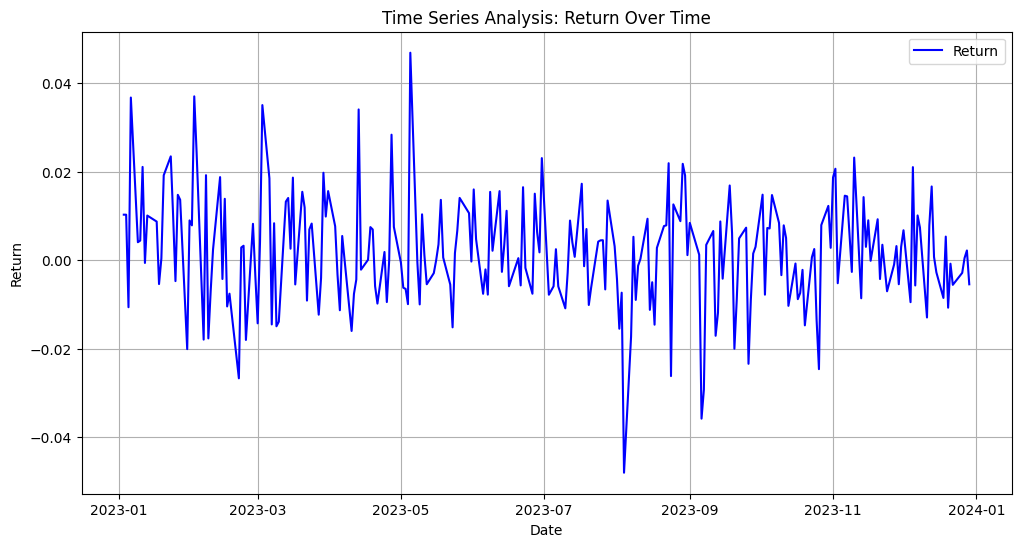

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('/content/portfolio.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as index
data.set_index('Date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Return'], color='blue', label='Return')
plt.title('Time Series Analysis: Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()


CORRELATION HEATMAP OF STOCK/ASSETS IN PORTFOLIO

<ipython-input-12-30d70b69cebf>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


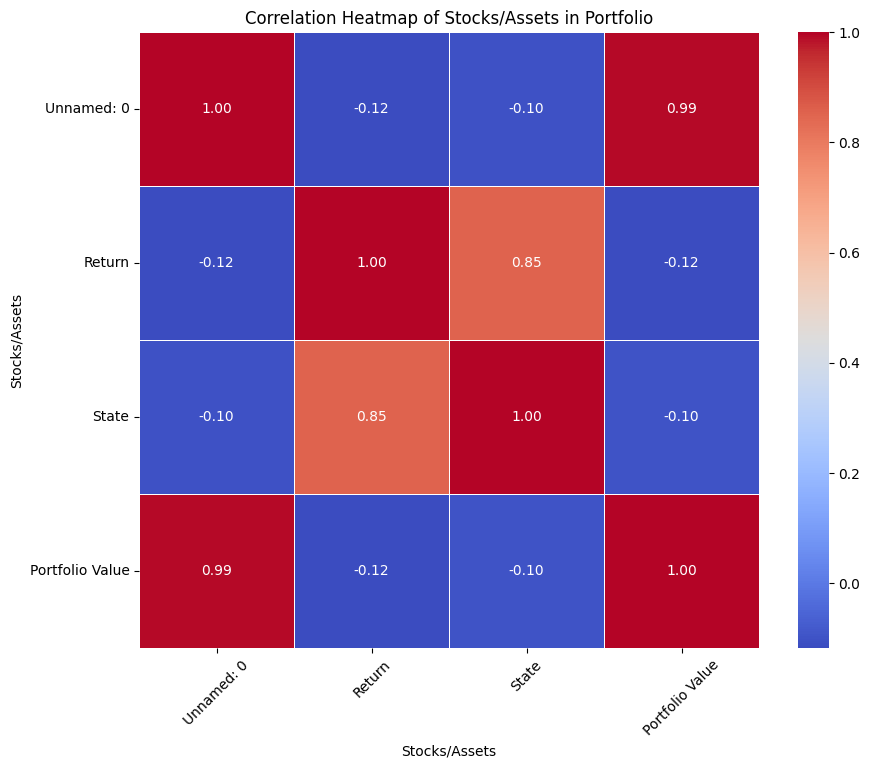

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/portfolio.csv"
df = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Stocks/Assets in Portfolio")
plt.xlabel("Stocks/Assets")
plt.ylabel("Stocks/Assets")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()